In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import ta
import talib
from backtesting import Backtest, Strategy

In [5]:
def clean_data(path):
    raw_data = pd.read_csv(path)
    data = raw_data.drop(["Volume"], axis=1)
    df = data.rename(columns={'Gmt time': 'Gmt_time'}, inplace = True)
    df = data.set_index("Gmt_time")
    return df

df_1h = clean_data("/home/ujwal/ML_program/Trading_financial_market/Algo-trading-with-ML/algo stratergy 1/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv")
df_4h = clean_data("/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models/AUDUSD_Candlestick_4_Hour_BID_03.09.2007-01.10.2022.csv")

df_1h

,Open,High,Low,Close
Gmt_time,,,,
03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157
03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237
03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267
03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327
03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157
...,...,...,...,...
01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023


In [6]:
df_4h

,Open,High,Low,Close
Gmt_time,,,,
03.09.2007 00:00:00.000,0.82127,0.82387,0.82057,0.82327
03.09.2007 04:00:00.000,0.82337,0.82387,0.82057,0.82137
03.09.2007 08:00:00.000,0.82127,0.82197,0.81887,0.82017
03.09.2007 12:00:00.000,0.81957,0.82137,0.81947,0.82117
03.09.2007 16:00:00.000,0.82107,0.82357,0.82037,0.82037
...,...,...,...,...
01.10.2022 04:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 08:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 12:00:00.000,0.64023,0.64023,0.64023,0.64023


<AxesSubplot:xlabel='Gmt_time'>

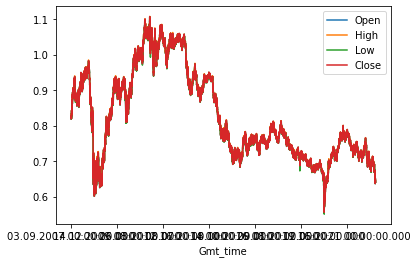

In [7]:
df_1h.plot()

In [8]:
# Cheking for infinite or null value
def check(data):
    sum_inf = np.isinf(data).values.sum()
    sum_nan = data.isna().sum()
    return sum_inf, sum_nan

df_1H = check(df_1h)
df_4H = check(df_4h)

print("number of inf value present && number of nan value present on df_1H =", df_1H)
print("number of inf value present && number of nan value present on df_4H =", df_4H)

number of inf value present && number of nan value present on df_1H = (0, Open     0
High     0
Low      0
Close    0
dtype: int64)
number of inf value present && number of nan value present on df_4H = (0, Open     0
High     0
Low      0
Close    0
dtype: int64)


In [9]:
# Create Exponential moving average
def EMA(data, period, column = 'Close'):
    return data[column].ewm(span = period, adjust = False).mean()


In [10]:
# Anchor chart
EMA_8_4H = EMA(df_4h, 8)
EMA_13_4H = EMA(df_4h, 13)
EMA_21_4H = EMA(df_4h, 21)

# Trading chart
EMA_8_1H = EMA(df_1h, 8)
EMA_13_1H = EMA(df_1h, 13)
EMA_21_1H = EMA(df_1h, 21)

In [ ]:
# Loading model

In [ ]:
# class trend_trading_stratergy_1(Stratergy):
#     for i in range(df_1h.index):
#         EMA_8_4H = EMA(df_4h[i], 8)
#         EMA_13_4H = EMA(df_4h[i], 13)
#         EMA_21_4H = EMA(df_4h[i], 21)
#         iter1 =[]
#         iter2 =[]
#         if EMA_8_4H<EMA_13_4H<EMA_21_4H or EMA_8_4H>EMA_13_4H>EMA_21_4H :
#             if i == df_1h.index[df_1h.index.get_loc(iter1)+4] :
#                 if i == df_1h.index[df_1h.index.get_loc(iter2)+4] :
#                     engulfing = talib.CDLENGULFING(df_1h.Open[i], df_1h.High[i], df_1h.Low[i], df_1h.Close[i])
#                     hammer = talib.CDLHAMMER(df_1h.Open[i], df_1h.High[i], df_1h.Low[i], df_1h.Close[i])
#                     if engulfing or hammer != 0 :
#                         self.buy()

#                 else:    
#                     iter2 = i

#             iter1 = i
    
    


In [44]:
for hour in df_1h.index:
    print(hour)

03.09.2007 00:00:00.000
03.09.2007 01:00:00.000
03.09.2007 02:00:00.000
03.09.2007 03:00:00.000
03.09.2007 04:00:00.000
03.09.2007 05:00:00.000
03.09.2007 06:00:00.000
03.09.2007 07:00:00.000
03.09.2007 08:00:00.000
03.09.2007 09:00:00.000
03.09.2007 10:00:00.000
03.09.2007 11:00:00.000
03.09.2007 12:00:00.000
03.09.2007 13:00:00.000
03.09.2007 14:00:00.000
03.09.2007 15:00:00.000
03.09.2007 16:00:00.000
03.09.2007 17:00:00.000
03.09.2007 18:00:00.000
03.09.2007 19:00:00.000
03.09.2007 20:00:00.000
03.09.2007 21:00:00.000
03.09.2007 22:00:00.000
03.09.2007 23:00:00.000
04.09.2007 00:00:00.000
04.09.2007 01:00:00.000
04.09.2007 02:00:00.000
04.09.2007 03:00:00.000
04.09.2007 04:00:00.000
04.09.2007 05:00:00.000
04.09.2007 06:00:00.000
04.09.2007 07:00:00.000
04.09.2007 08:00:00.000
04.09.2007 09:00:00.000
04.09.2007 10:00:00.000
04.09.2007 11:00:00.000
04.09.2007 12:00:00.000
04.09.2007 13:00:00.000
04.09.2007 14:00:00.000
04.09.2007 15:00:00.000
04.09.2007 16:00:00.000
04.09.2007 17:00

KeyboardInterrupt: 

In [77]:
a = df_1h.index[5]
a

'03.09.2007 05:00:00.000'

In [68]:
df_1h.loc["03.09.2007 04:00:00.000"]

Open     6.58696
High     6.59096
Low      6.57016
Close    6.57256
Name: 03.09.2007 04:00:00.000, dtype: float64

In [64]:
for i in df_1h.index:
    a = ++i
    print(a)


TypeError: bad operand type for unary +: 'str'

In [90]:
df_1h.iloc[5].name

'03.09.2007 05:00:00.000'

In [161]:
df_1h.loc['03.09.2007 05:00:00.000'].

<bound method Series.diff of Open     0.82147
High     0.82327
Low      0.82127
Close    0.82217
Name: 03.09.2007 05:00:00.000, dtype: float64>

In [163]:
df_1h.index[5]

'03.09.2007 05:00:00.000'

In [166]:
df_1h.index.get_loc('03.09.2007 08:00:00.000')

8

In [170]:
df_1h.index[df_1h.index.get_loc('03.09.2007 08:00:00.000')+4]

'03.09.2007 12:00:00.000'

In [14]:
class trend_trading_stratergy_1(Strategy):
    def init(self):
        for i in range(self.data.index):
            EMA_8_4H = EMA(df_4h[i], 8)
            EMA_13_4H = EMA(df_4h[i], 13)
            EMA_21_4H = EMA(df_4h[i], 21)
            iter1 =[]
            iter2 =[]
            if EMA_8_4H<EMA_13_4H<EMA_21_4H or EMA_8_4H>EMA_13_4H>EMA_21_4H :
                if i == self.data.index[self.data.index.get_loc(iter1)+4] :
                    if i == self.data.index[self.data.index.get_loc(iter2)+4] :
                        engulfing = talib.CDLENGULFING(self.data.Open[i], self.data.High[i], self.data.Low[i], self.data.Close[i])
                        hammer = talib.CDLHAMMER(self.data.Open[i], self.data.High[i], self.data.Low[i], self.data.Close[i])
                        if engulfing or hammer != 0 :
                            self.buy()

                    else:    
                        iter2 = i

                iter1 = i

In [22]:
df_1h

,Open,High,Low,Close
Gmt_time,,,,
03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157
03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237
03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267
03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327
03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157
...,...,...,...,...
01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023
01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023


In [17]:
bt = Backtest(df_1h, strategy=trend_trading_stratergy_1, cash=1000, commission=0.002, exclusive_orders=True )

/tmp/ipykernel_3322/1433072274.py:1: UserWarning: Data index is not sorted in ascending order. Sorting.
  bt = Backtest(df_1h, strategy=trend_trading_stratergy_1, cash=1000, commission=0.002, exclusive_orders=True )
/tmp/ipykernel_3322/1433072274.py:1: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df_1h, strategy=trend_trading_stratergy_1, cash=1000, commission=0.002, exclusive_orders=True )


In [19]:
output = bt.run
output

<bound method Backtest.run of <backtesting.backtesting.Backtest object at 0x7f2013cac610>>

In [20]:
bt.plot()

RuntimeError: First issue `backtest.run()` to obtain results.